In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load The Dataset

badminton_df = pd.read_csv("/content/gdrive/MyDrive/reviews_badminton.csv")
tawa_df = pd.read_csv("/content/gdrive/MyDrive/reviews_tawa.csv")
tea_df = pd.read_csv("/content/gdrive/MyDrive/reviews_tea.csv")

In [4]:
badminton_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
badminton_df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [6]:
badminton_df.isnull().sum()

,0
Reviewer Name,10
Review Title,10
Place of Review,50
Up Votes,10
Down Votes,10
Month,465
Review text,8
Ratings,0


In [7]:
tawa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer_Name    2531 non-null   object 
 1   Reviewer_Rating  2285 non-null   float64
 2   Review_Title     2531 non-null   object 
 3   Review_Text      2531 non-null   object 
 4   Place_of_Review  2531 non-null   object 
 5   Date_of_Review   2531 non-null   object 
 6   Up_Votes         2531 non-null   int64  
 7   Down_Votes       2531 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 158.3+ KB


In [8]:
tawa_df

,Reviewer_Name,Reviewer_Rating,Review_Title,Review_Text,Place_of_Review,Date_of_Review,Up_Votes,Down_Votes
0,Sumit Kumar,5.0,Wonderful,I think In this price category it's best dosa ...,"Certified Buyer, Lakhisarai",Sumit Kumar,211,39
1,BHARAT GALAGALI,5.0,Mind-blowing purchase,perfect tawa for Dosa..READ MORE,"Certified Buyer, Hunsur",BHARAT GALAGALI,107,17
2,Paramjeet Singh,5.0,Awesome,Excellent tawa. Made Paneer Tikka on first day...,"Certified Buyer, Rampura Phul",Paramjeet Singh,59,8
3,Virendra Kumar,5.0,Great product,Nice 🙂 productREAD MORE,"Certified Buyer, Chengalpattu District",Virendra Kumar,77,12
4,jyoti solanki,5.0,Best in the market!,Delivery man is also good....READ MORE,"Certified Buyer, Mumbai",jyoti solanki,53,7
...,...,...,...,...,...,...,...,...
2526,Sandeep Mohapatra,3.0,Fair,No Handel includedREAD MORE,"Certified Buyer, Puri",Sandeep Mohapatra,0,0
2527,Vakul Rana,4.0,Good quality product,niceREAD MORE,"Certified Buyer, Chandigarh",Vakul Rana,0,0
2528,Somraj Dhungana,4.0,Really Nice,Everything is good in this price but handle is...,"Certified Buyer, Bengaluru",Somraj Dhungana,0,0
2529,Veeranna N C,3.0,Good,Tawa OK .but Handle not regid.poor handle.READ...,"Certified Buyer, Bengaluru",Veeranna N C,0,0


In [9]:
tawa_df.describe()

,Reviewer_Rating,Up_Votes,Down_Votes
count,2285.000000,2531.000000,2531.000000
mean,4.490153,1.668906,0.493876
std,0.708662,15.462623,5.485326
min,3.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000
max,5.000000,378.000000,144.000000


In [10]:
tawa_df.isnull().sum()

,0
Reviewer_Name,0
Reviewer_Rating,246
Review_Title,0
Review_Text,0
Place_of_Review,0
Date_of_Review,0
Up_Votes,0
Down_Votes,0


In [11]:
# Explore tea_df Third

tea_df

,reviewer_name,reviewer_rating,review_title,review_text,place_of_review,Date_of_review,up_votes,Down_votes
0,Subhro Banerjee,5,Worth every penny,Great product 🤗 with great deals 😍😍 Tata Tea G...,"Certified Buyer, Budge Budge",Subhro Banerjee,236,59
1,Shiv chandra Jha,5,Great product,Very nice and super qwality tea taste are grea...,"Certified Buyer, Saharsa",Shiv chandra Jha,225,79
2,Flipkart Customer,5,Highly recommended,Great test great quality great price point tim...,"Certified Buyer, Sri Ganganagar",Flipkart Customer,89,27
3,DTH Y,4,Very Good,Nice 😊READ MORE,"Certified Buyer, Phaltan",DTH Y,30,6
4,Bhavesh Godhani,5,Classy product,Very Good Tata tea product.READ MORE,"Certified Buyer, Ahmedabad",Bhavesh Godhani,69,22
...,...,...,...,...,...,...,...,...
9165,Omm Prakash,5,Simply awesome,Nice for red tea.Valeu for moneyREAD MORE,"Certified Buyer, Dhamanagar",Omm Prakash,26,5
9166,Ritu Raj,4,Good choice,niceREAD MORE,"Certified Buyer, Katihar District",Ritu Raj,19,4
9167,Arun Saini,1,Terrible product,Tata Gold Vs Tata Tea Premium👍Tata Tea Premiu...,"Certified Buyer, Haridwar",Arun Saini,13,2
9168,Amitabh Shahi,5,Just wow!,I believe that it's the best packaged tea in t...,"Certified Buyer, Darbhanga",Amitabh Shahi,32,10


In [12]:
tea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9170 entries, 0 to 9169
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewer_name    9170 non-null   object
 1   reviewer_rating  9170 non-null   int64 
 2   review_title     9170 non-null   object
 3   review_text      9170 non-null   object
 4   place_of_review  9170 non-null   object
 5   Date_of_review   9170 non-null   object
 6   up_votes         9170 non-null   int64 
 7   Down_votes       9170 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 573.3+ KB


In [13]:
tea_df.describe()

,reviewer_rating,up_votes,Down_votes
count,9170.000000,9170.000000,9170.000000
mean,4.400000,80.747001,24.300000
std,1.200065,78.390238,24.602358
min,1.000000,13.000000,2.000000
25%,4.000000,26.000000,5.000000
50%,5.000000,50.500000,16.000000
75%,5.000000,89.000000,29.000000
max,5.000000,236.000000,79.000000


In [14]:
tea_df.isnull().sum()

,0
reviewer_name,0
reviewer_rating,0
review_title,0
review_text,0
place_of_review,0
Date_of_review,0
up_votes,0
Down_votes,0


In [15]:
print(badminton_df.columns)
print(tawa_df.columns)
print(tea_df.columns)

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')
Index(['Reviewer_Name', 'Reviewer_Rating', 'Review_Title', 'Review_Text',
       'Place_of_Review', 'Date_of_Review', 'Up_Votes', 'Down_Votes'],
      dtype='object')
Index(['reviewer_name', 'reviewer_rating', 'review_title', 'review_text',
       'place_of_review', 'Date_of_review', 'up_votes', 'Down_votes'],
      dtype='object')


**DATA PREPROCESSING**

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
combined_df = pd.concat([badminton_df, tawa_df, tea_df])

In [18]:
# Text Cleaning

def clean_text(text):
    text = re.sub(r"[^a-zA-Z0-9]", " ", str(text))
    text = text.lower()
    return text

In [19]:
# Text Normalization

def normalize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    normalized_words = [lemmatizer.lemmatize(word) for word in words]
    normalized_text = " ".join(normalized_words)
    return normalized_text

In [20]:
# Combine Clean & Normalization

def preprocess_text(text):
    cleaned_text = clean_text(text)
    normalized_text = normalize_text(cleaned_text)
    return normalized_text

In [21]:
combined_df['processed_text'] = combined_df['review_text'].apply(preprocess_text)

In [22]:
# Checking all Preprocess Data

print("Badminton Data:")
print(badminton_df.head())

Badminton Data:
            Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place of Review  Up Votes  Down Votes     Month  \
0   Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0       NaN   
4                          NaN     147.0        24.0  Apr 2016   

                                         Review text  Ratings  
0  Nice product, good quality, but price is now r...        4  
1  They didn't supplied Yonex Mavis 350. Outside ...        1  
2  Worst product. Damaged shuttlecocks packed in ...      

In [23]:
print("\nTawa Data:")
print(tawa_df.head())


Tawa Data:
     Reviewer_Name  Reviewer_Rating           Review_Title  \
0     Sumit  Kumar              5.0              Wonderful   
1  BHARAT GALAGALI              5.0  Mind-blowing purchase   
2  Paramjeet Singh              5.0                Awesome   
3  Virendra  Kumar              5.0          Great product   
4    jyoti solanki              5.0    Best in the market!   

                                         Review_Text  \
0  I think In this price category it's best dosa ...   
1                   perfect tawa for Dosa..READ MORE   
2  Excellent tawa. Made Paneer Tikka on first day...   
3                            Nice 🙂 productREAD MORE   
4             Delivery man is also good....READ MORE   

                          Place_of_Review   Date_of_Review  Up_Votes  \
0             Certified Buyer, Lakhisarai     Sumit  Kumar       211   
1                 Certified Buyer, Hunsur  BHARAT GALAGALI       107   
2           Certified Buyer, Rampura Phul  Paramjeet Singh    

In [24]:
print("\nTea Data:")
print(tea_df.head())


Tea Data:
       reviewer_name  reviewer_rating        review_title  \
0   Subhro  Banerjee                5   Worth every penny   
1  Shiv chandra  Jha                5       Great product   
2  Flipkart Customer                5  Highly recommended   
3              DTH Y                4           Very Good   
4    Bhavesh Godhani                5      Classy product   

                                         review_text  \
0  Great product 🤗 with great deals 😍😍 Tata Tea G...   
1  Very nice and super qwality tea taste are grea...   
2  Great test great quality great price point tim...   
3                                    Nice 😊READ MORE   
4               Very Good Tata tea product.READ MORE   

                   place_of_review     Date_of_review  up_votes  Down_votes  
0     Certified Buyer, Budge Budge   Subhro  Banerjee       236          59  
1         Certified Buyer, Saharsa  Shiv chandra  Jha       225          79  
2  Certified Buyer, Sri Ganganagar  Flipkart Custom

**SENTIMENT ANALYSIS**

In [25]:
combined_df = pd.concat([badminton_df, tawa_df, tea_df])

In [26]:
sid = SentimentIntensityAnalyzer()

In [27]:
combined_df['review_text'] = combined_df['review_text'].astype(str)

In [28]:
combined_df = combined_df.dropna(subset=['review_text'])

In [29]:
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

In [30]:
combined_df['sentiment_score'] = combined_df['review_text'].apply(get_sentiment_score)

In [31]:
combined_df['sentiment'] = combined_df['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else 'Negative')

In [32]:
print(combined_df[['review_text', 'sentiment_score', 'sentiment']].head())

  review_text  sentiment_score sentiment
0         nan              0.0  Negative
1         nan              0.0  Negative
2         nan              0.0  Negative
3         nan              0.0  Negative
4         nan              0.0  Negative


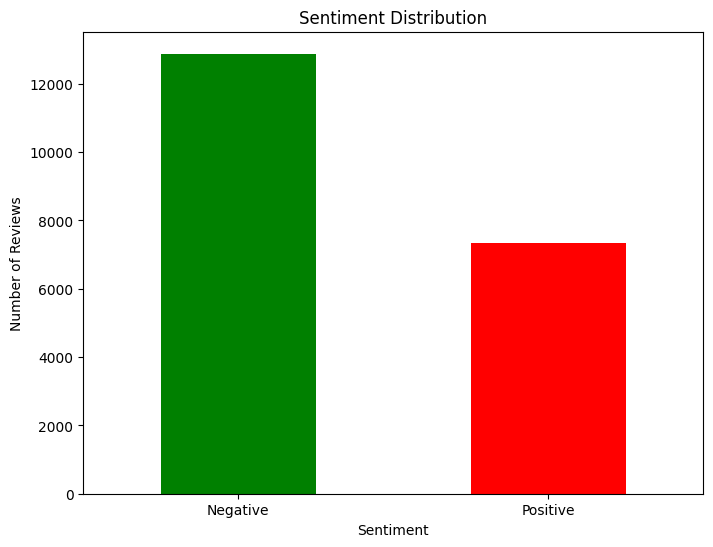

In [33]:
sentiment_counts = combined_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

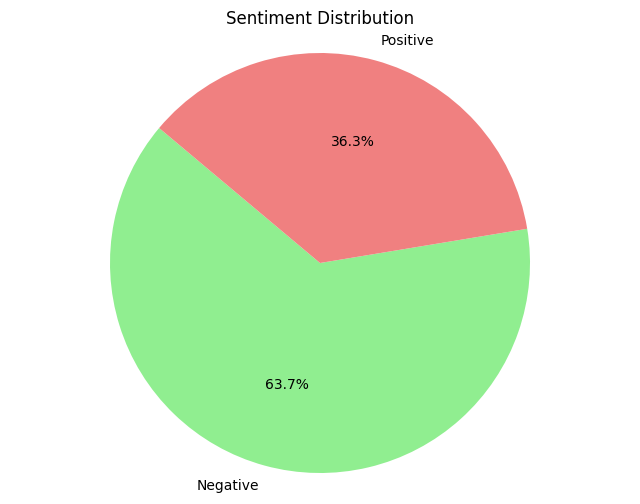

In [34]:
sentiment_counts = combined_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

**MODEL TRAINING**

In [35]:
# Import Libraries For Model Training

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pickle

In [36]:
X = combined_df['review_text']
y = combined_df['sentiment']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [39]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [40]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2580
    Positive       1.00      1.00      1.00      1464

    accuracy                           1.00      4044
   macro avg       1.00      1.00      1.00      4044
weighted avg       1.00      1.00      1.00      4044



In [41]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")
print(f"F1-Score: {f1*100}")

F1-Score: 1.0
F1-Score: 100.0


In [42]:
with open('model.pkl', 'wb') as f:
    pickle.dump((model, tfidf_vectorizer), f)

**MODEL DEPLOYMENT**

In [43]:
from flask import Flask, render_template, request
import pickle

app = Flask(__name__)

In [44]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
def preprocess_text(text):
    return text
def predict_sentiment(text):
    text_processed = preprocess_text(text)
    prediction = model.predict([text_processed])[0]
    sentiment = 'Positive' if prediction == 1 else 'Negative'
    return sentiment

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        text = request.form['text']
        sentiment = predict_sentiment(text)
        return render_template('result.html', text=text, sentiment=sentiment)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
